# Gini-Index

Wir schreiben zwei Funktionen:

- Eine Funktion *gini*,die den Gini-Koeffizienten bzw. Gini-Index berechnet (auch normiert)
- Eine Funktion *lorenz*, die die Lorenz-Kurve zeichnet.

Zur Berechnung des Gini-Koeffizienten:

$G = \frac{2 \cdot \sum_{i=1}^{n}i \cdot x_{(i)}}{n \cdot \sum_{i=1}^{n}x_{(i)}} - \frac{n+1}{n}$

mit $i$ ist der Rang des Wertes (sortiert).

Der **normierte** Gini-Index liefert bei maximaler Ungleichverteilung den Wert 1:

$G^* = G \cdot \frac{n}{n-1}$

In [2]:
import  numpy as np 

def gini(data, normed=False):
    data = np.sort(data)
    n = data.size
    sum_i=0
    for i in range(n):
        sum_i += (i+1) * data[i]
    g = 2*sum_i /(n * data.sum()) - (n+1)/n
    return g * n/(n-1) if normed else g

In [4]:
import matplotlib.pyplot as plt
def lorenz(data):
    data = np.sort(data)
    n = data.size
  
    
    kumuliert = np.cumsum(data)/data.sum()
    kumuliert = np.insert(kumuliert, 0, 0)
    
    anteile_an_gesamt = np.arange(0, n+1) / n

    # Koordinaten für Winkelhalbierende
    x1, y1 = [0,0], [1, 1]
    
    # Ermittle Gini-Koeffizienten für Plot-Titel
    G = round(gini(data),3)
    G_norm = round(gini(data,True),3)
    
    # Plotten
    plt.plot(anteile_an_gesamt, kumuliert, color="r")
    plt.plot([x1, y1], color="k")
    plt.suptitle("Lorenz-Kurve")
    plt.title(f"Gini-Koeffizient = {G}, normiert = {G_norm}")
    plt.show()

In [6]:
# Test der Funktionen

data = np.array([12, 8, 1, 22, 40])
gini(data)

0.44337349397590375

In [8]:
gini(data, True)

0.5542168674698797

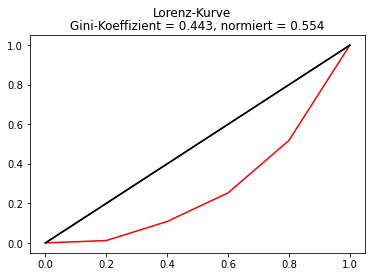

In [9]:
lorenz(data)